In [55]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit

from my_utils.my_utils import printMD

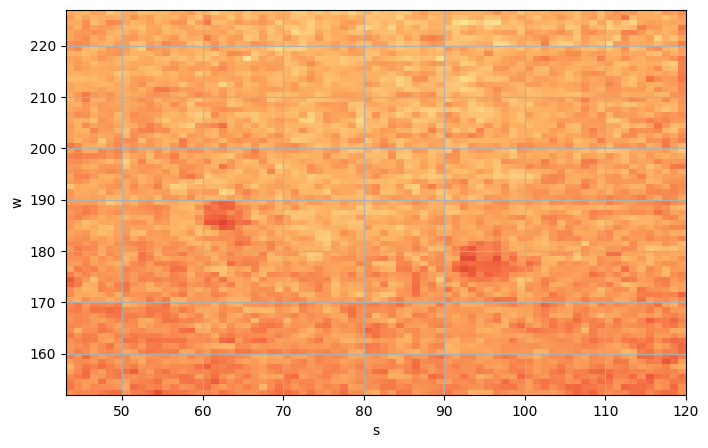

(73, 77)


In [20]:
file = uproot.open("root_files/gopa3-ngri+-ped.root")
w, x, y = file["h7"].to_numpy()

degree_of_rotation = -2.2
wT_rotated = ndimage.rotate(w.T, degree_of_rotation, reshape=False)

fig, ax = plt.subplots(figsize=(8, 5))
mesh = ax.pcolormesh(range(len(x)), y, wT_rotated, cmap="RdYlBu", vmin=200, vmax=400)
ax.set_xlabel("s")
ax.set_ylabel("w")
# ax.set_ylim(2, 75)
ax.set_ylim(152, 227)
ax.set_xlim(43, 120)
# fig.colorbar(mesh)
plt.grid()
plt.show()
print(wT_rotated[2:75, 43:120].shape)

## Whole picture + rotation to 2.2 degrees

In [24]:
degree_of_rotation = 2.2

file = uproot.open("root_files/gopa3-ngri+-ped.root")
w, _1, _2 = file["h7"].to_numpy()

w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T

y = range(w_new.shape[0])   # Rows
x = range(w_new.shape[1])   # Columns

print(w_new.shape)

(400, 124)


### Plotting

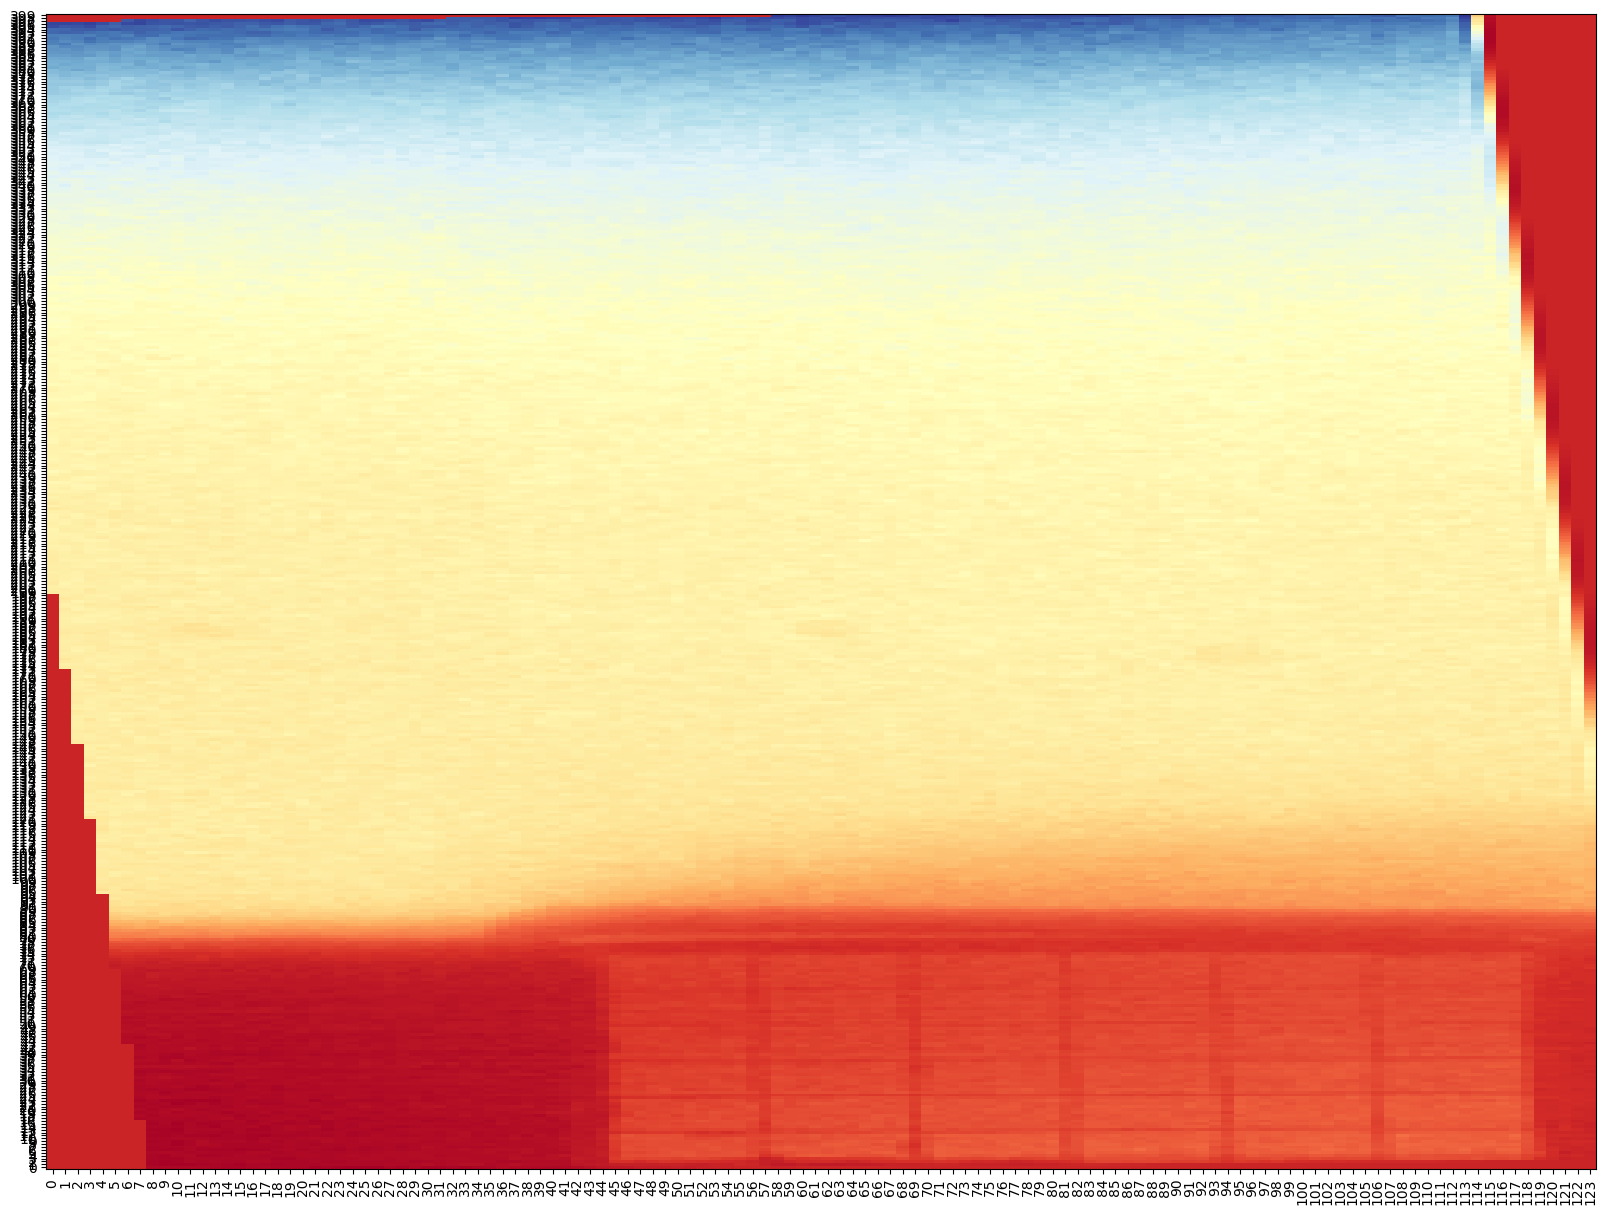

In [36]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.pcolormesh(x, y, w_new, cmap="RdYlBu")
plt.xticks(x, rotation=90)
plt.yticks(y)
plt.show()

## Cropping 2 pictures of same size
1. With grade
2. With markers

### With tungsten grade

### **With tungsten grade**

Box shape in bins: (73, 74)


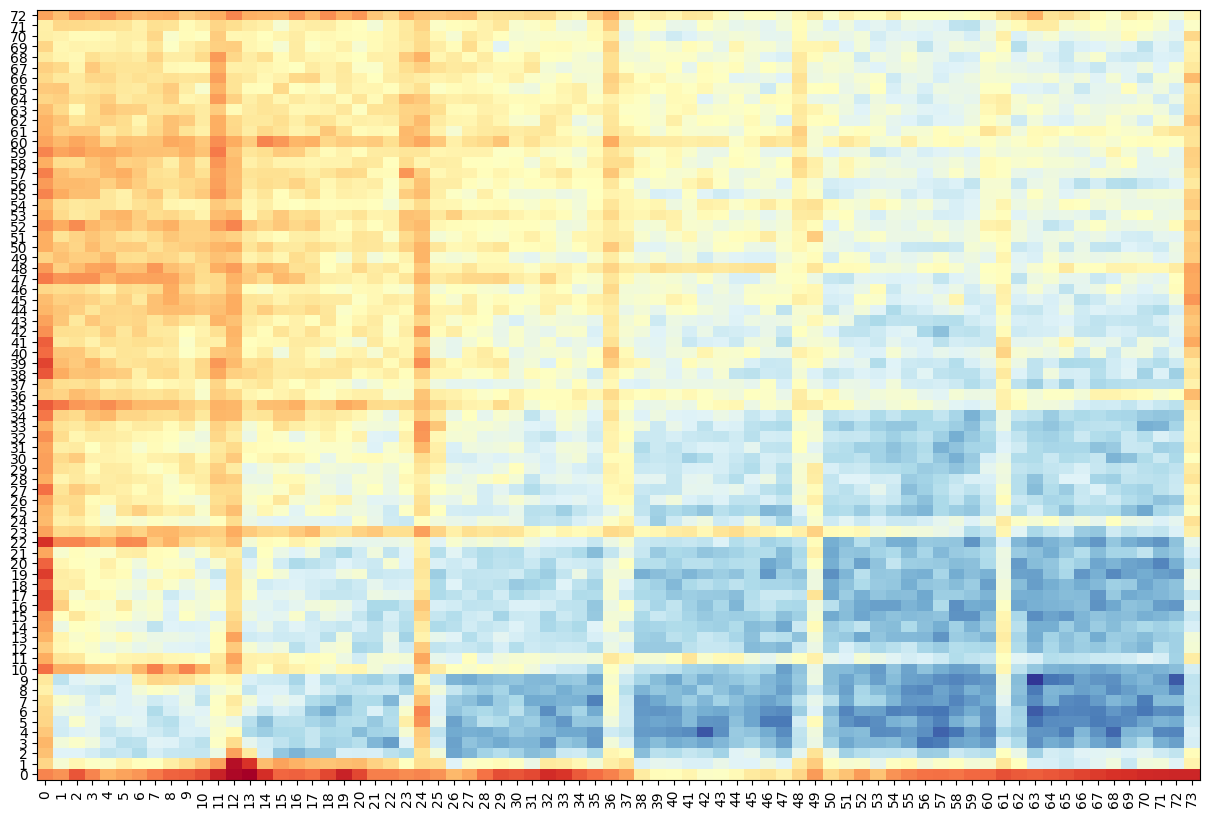

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
w_grade = w_new[2:75, 45:119]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu")
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **With tungsten grade**")
print("Box shape in bins:",w_grade.shape)
plt.show()

### With markers (no tungsten)

### **Markers (no grade)**

Box shape in bins: (73, 74)


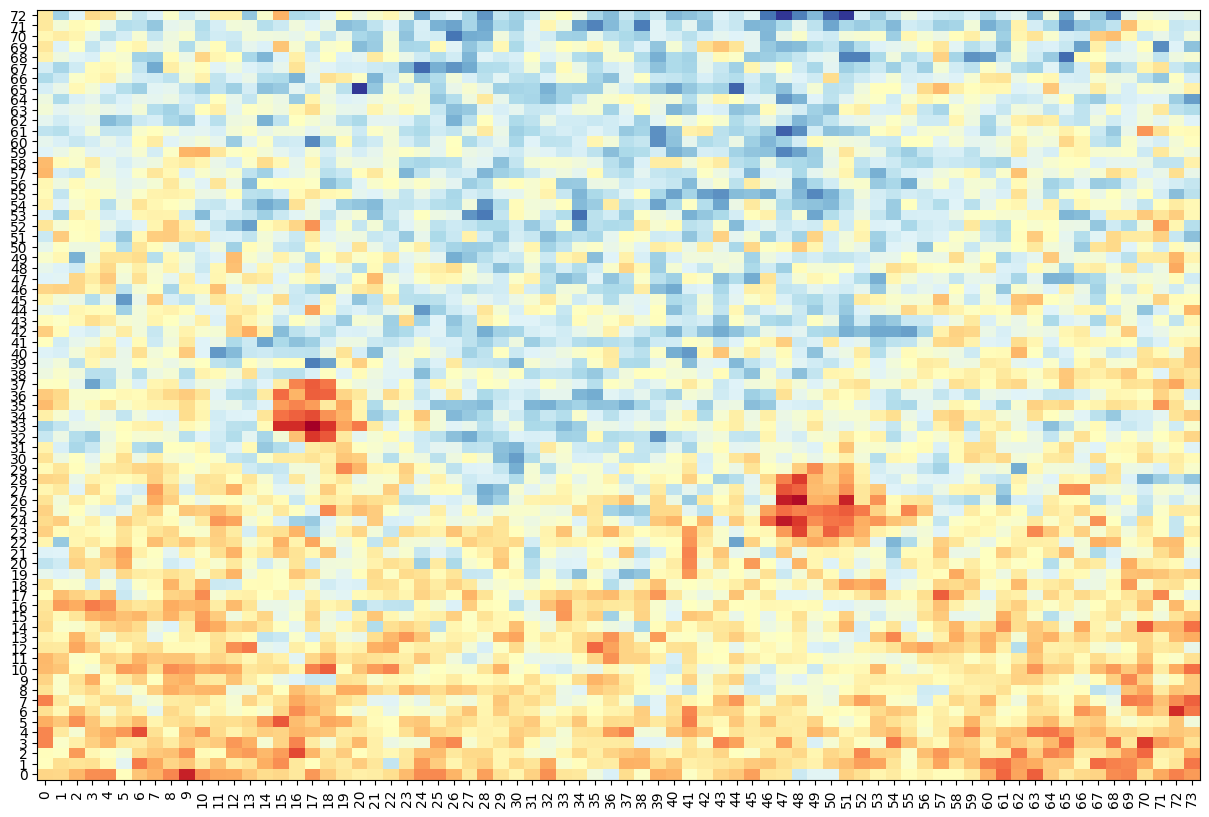

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
w_markers = w_new[152:225, 45:119]
y_markers = range(w_markers.shape[0])   # Rows
x_markers = range(w_markers.shape[1])   # Columns
ax.pcolormesh(x_markers, y_markers, w_markers, cmap="RdYlBu")
plt.xticks(x_markers, rotation=90)
plt.yticks(y_markers)
printMD("### **Markers (no grade)**")
print("Box shape in bins:",w_markers.shape)
plt.show()

## Making graphs

### **With tungsten grade**

Shape of summed matrix: (74,)


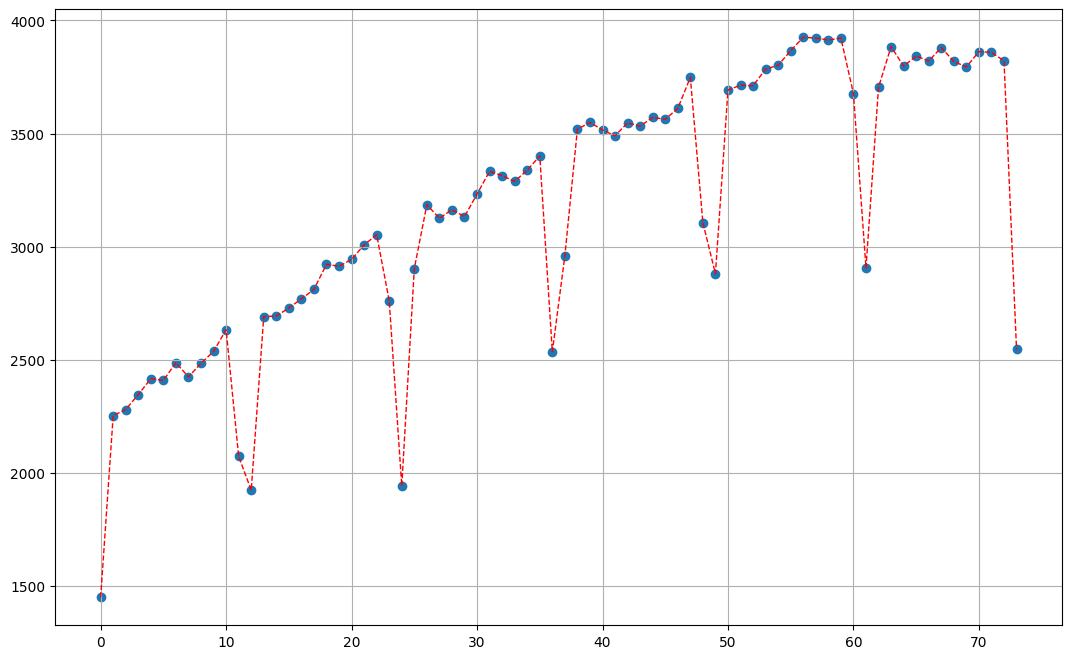

In [91]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_grade_summed = w_grade.sum(axis=_axis)
x_grade_summed = np.arange(len(w_grade_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_grade_summed, w_grade_summed)
ax.plot(x_grade_summed, w_grade_summed, '--', lw=1, c='r')
printMD("### **With tungsten grade**")
print("Shape of summed matrix:", w_grade_summed.shape)
plt.grid()
plt.show()

### **With tungsten grade**

Shape of summed matrix: (74,)


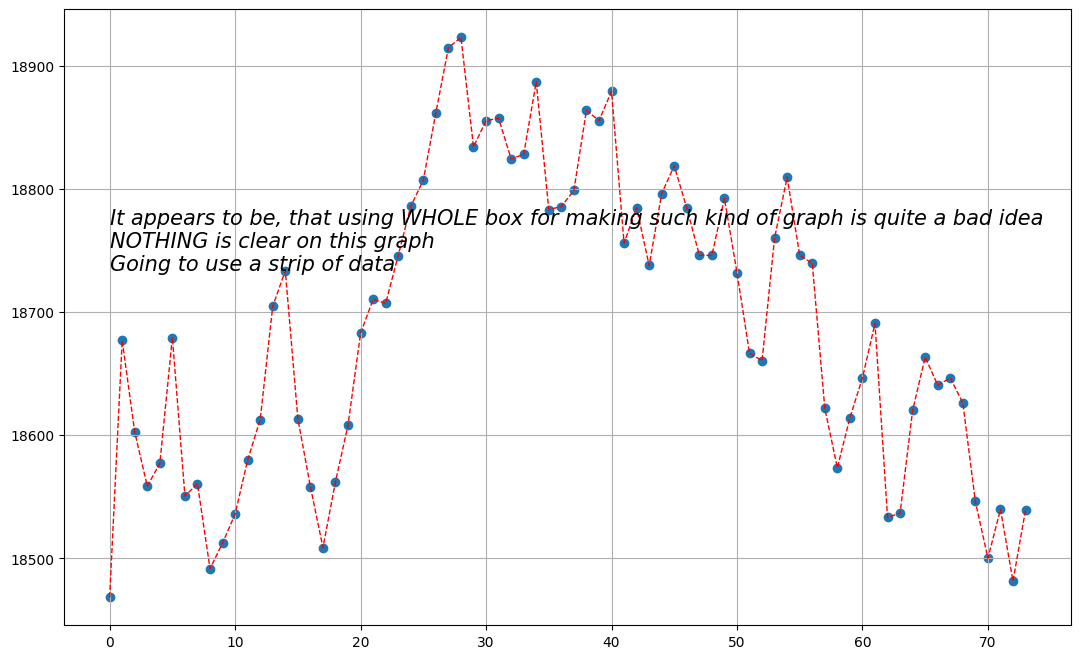

In [94]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **With tungsten grade**")
print("Shape of summed matrix:", w_markers_summed.shape)
ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
s="""It appears to be, that using WHOLE box for making such kind of graph is quite a bad idea
NOTHING is clear on this graph
Going to use a strip of data""",
fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

### **With tungsten grade**

Shape of summed matrix: (74,)


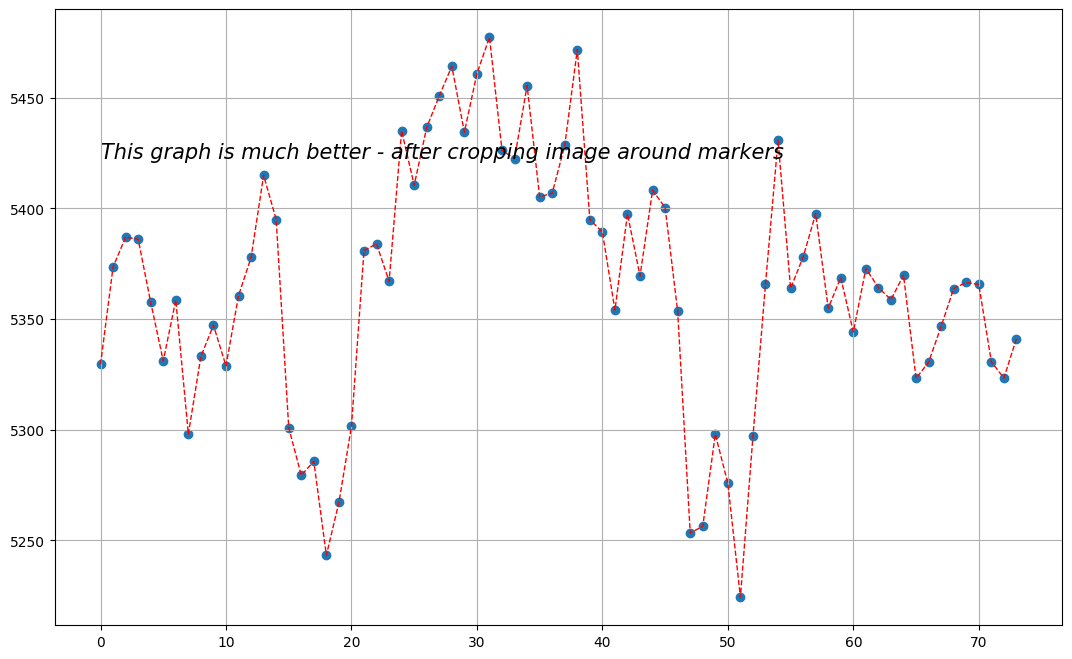

In [96]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers[20:41, :].sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **With tungsten grade**")
print("Shape of summed matrix:", w_markers_summed.shape)
ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
s="""This graph is much better - after cropping image around markers""",
fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

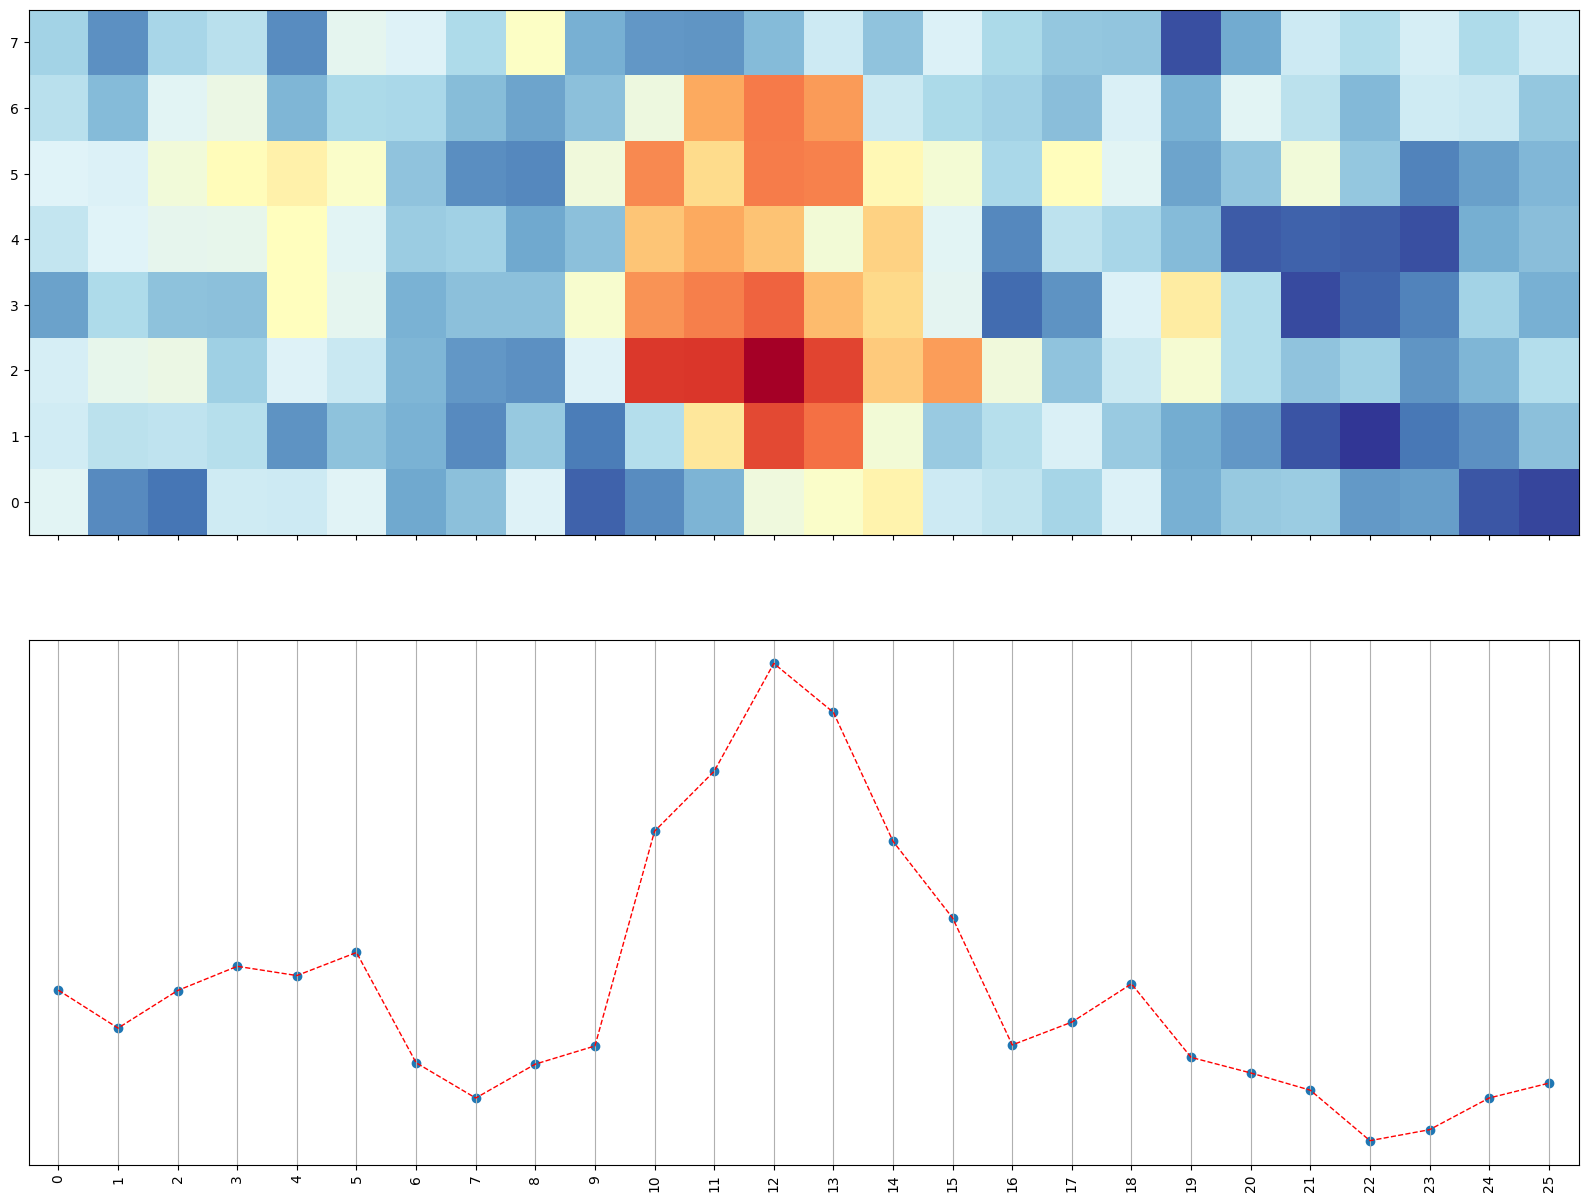

In [124]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 5:-43]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = -w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
ax[1].scatter(x_markers_summed, w_markers_summed)
ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
plt.grid()
plt.show()

## Fitting

In [ ]:
from lmfit.models import ExponentialModel, GaussianModel, VoigtModel

# Exponent
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)


# Gauss

voigt1 = VoigtModel(prefix='v1_')
pars.update(voigt1.make_params())

pars['v1_center'].set(value=3, min=1, max=5)
pars['v1_sigma'].set(value=0.1, min=0.05)
pars['v1_amplitude'].set(value=623, min=200)

voigt2 = VoigtModel(prefix='v2_')
pars.update(voigt2.make_params())

pars['v2_center'].set(value=16, min=16, max=18)
pars['v2_sigma'].set(value=0.1, min=0.05)
pars['v2_amplitude'].set(value=623, min=200)

voigt3 = VoigtModel(prefix='v3_')
pars.update(voigt3.make_params())

pars['v3_center'].set(value=28, min=25, max=30)
pars['v3_sigma'].set(value=0.1, min=0.05)
pars['v3_amplitude'].set(value=623, min=200)

mod = voigt1+voigt2+voigt3 + exp_mod
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)